# Healthcare Cost Prediction Model for DFW Insurance

### > Please follow the lines by pressing shift + enter to run each section of code. Start at the top and work your way down

### 1. Import all necessary libraries

In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#### 2. Our data is in a file named insurance.csv, please make sure that it is downloaded and in the same folder as this file. After finishing this step, you should see the first five rows of data.

In [191]:
names = ['Age','Sex','BMI', 'Children', 'Smoker', 'Region(US)', 'Healthcare Costs']
insurance_data = pd.read_csv('insurance.csv', names = names)
insurance_data.head()

,Age,Sex,BMI,Children,Smoker,Region(US),Healthcare Costs
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. Create the data and split into X/y for testing and training 

In [194]:
X = insurance_data.drop("Healthcare Costs", axis=1)
y = insurance_data["Healthcare Costs"]


#### 4. We will need to change our categories from categorical to numerical since our model will not be able to understand it. We will be using one-hot encoding to change these categories into numebers.

In [197]:
person_attr = ["Sex", "Children", "Smoker", "Region(US)"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, person_attr)], remainder="passthrough")

#### 5. Now we will need to split the data into training and test sets, we will be using a test set of 20%. We will also create our random seed in this step

In [200]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2)


#### 6. Now we transform our data from categorical to numerical using the transformer that we created in step 4

In [203]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

#### 7. Fit and score the model

In [206]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_transformed, y_train)
score = model.score(X_test_transformed, y_test)
print(f"Model R^2 Score: {score:.2}")

Model R^2 Score: 0.86


## Prediction for individual users

#### - User will need to input data into the below structure. 

    - Only change data in the brackets, and press shift + enter

    - 'Sex': ['male'], 
    - 'Children': [1], 
    - 'Smoker': ['no'], 
    - 'Region(US)': ['northeast'], 
    - 'Age': [38],
    - 'BMI': [37.05]

An example has done below for you to view 

#### 1. See below example 

In [210]:
userInput = pd.DataFrame({
    'Sex': ['male'], 
    'Children': [1], 
    'Smoker': ['no'], 
    'Region(US)': ['northeast'], 
    'Age': [38],
    'BMI': [37.05]
})

# Transform the new user input
newUserInput_transformed = transformer.transform(userInput)

# Predict using the trained model
prediction = model.predict(newUserInput_transformed)
print(f"Predicted Healthcare Costs: {prediction[0]:.2f}")

Predicted Healthcare Costs: 7610.98


#### 2. User sample format, just need to re-enter the data and press shift + enter to rerun

In [212]:
userInput = pd.DataFrame({
    'Sex': ['female'], 
    'Children': [0], 
    'Smoker': ['yes'], 
    'Region(US)': ['southwest'], 
    'Age': [19],
    'BMI': [27.900]
})

# Transform the new user input
newUserInput_transformed = transformer.transform(userInput)

# Predict using the trained model
prediction = model.predict(newUserInput_transformed)
print(f"Predicted Healthcare Costs: {prediction[0]:.2f}")

Predicted Healthcare Costs: 17106.20


# Visualizations

#### 1. We can create box charts that show each attribute and their affect on healthcare costs. As you can see below being a smoker has a greater difference in healthcare costs compared to gender and region. 

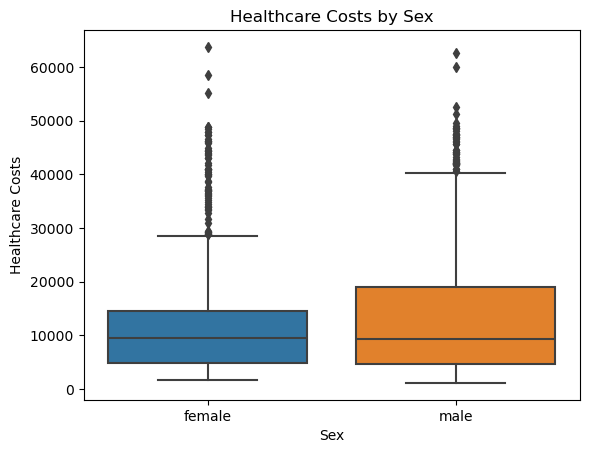

In [215]:
sns.boxplot(data=insurance_data, x='Sex', y='Healthcare Costs')
plt.title('Healthcare Costs by Sex')
plt.show()

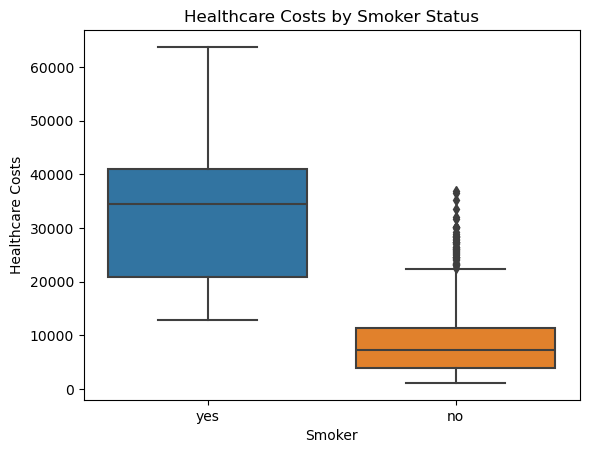

In [216]:
sns.boxplot(data=insurance_data, x='Smoker', y='Healthcare Costs')
plt.title('Healthcare Costs by Smoker Status')
plt.show()

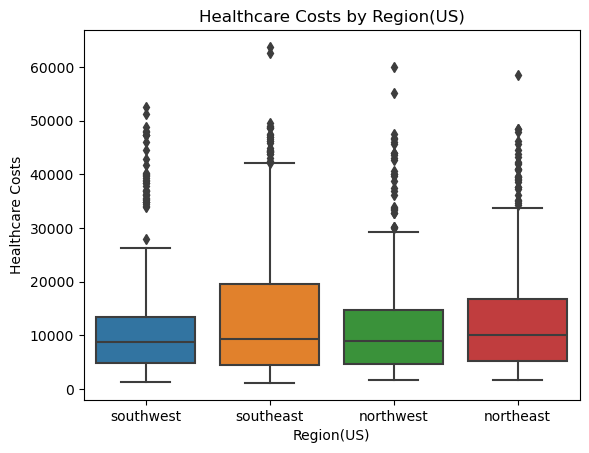

In [254]:
sns.boxplot(data=insurance_data, x='Region(US)', y='Healthcare Costs')
plt.title('Healthcare Costs by Region(US)')
plt.show()

#### 2. Another factor that you think would lead to higher health insurance costs is BMI, while it is not a positive factor for lower healthcare costs, really the driving factor is if you are a smoker or not. 

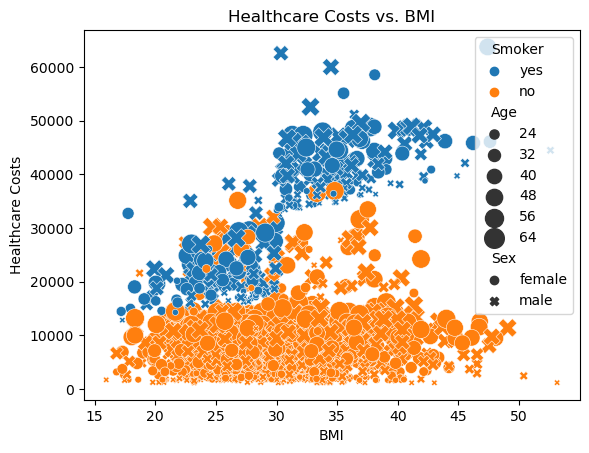

In [221]:
sns.scatterplot(data=insurance_data, x='BMI', y='Healthcare Costs', hue='Smoker', style='Sex', size='Age', sizes=(20, 200))
plt.title('Healthcare Costs vs. BMI')
plt.show()

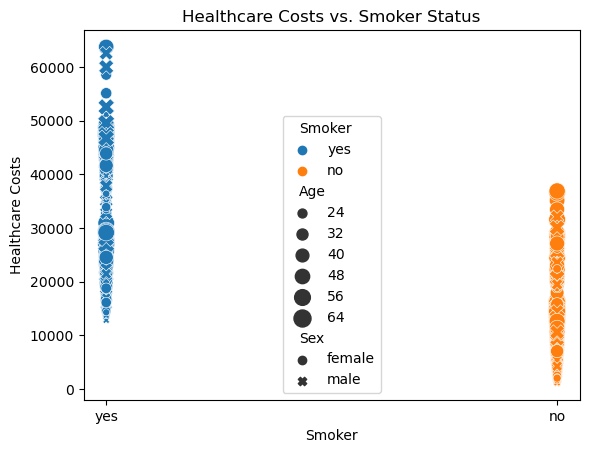

In [223]:
sns.scatterplot(data=insurance_data, x='Smoker', y='Healthcare Costs', hue='Smoker', style='Sex', size='Age', sizes=(25, 150))
plt.title('Healthcare Costs vs. Smoker Status')
plt.show()

#### 3. Here is a histogram showing the how much a smoker costs DFW Insurance 

C:\Users\Jay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


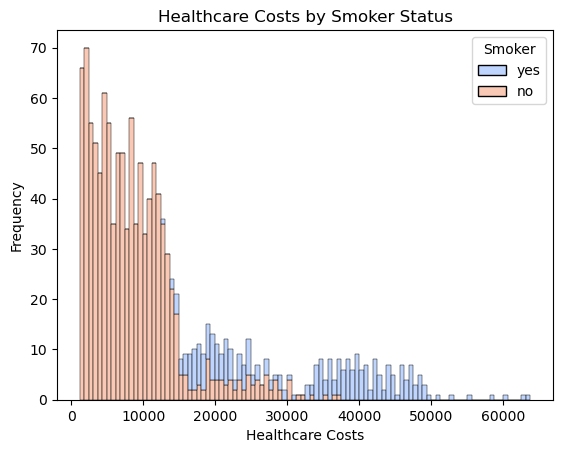

In [252]:
sns.histplot(data=insurance_data, x='Healthcare Costs', hue='Smoker', multiple='stack', palette='coolwarm', bins=100)
plt.title('Healthcare Costs by Smoker Status')
plt.xlabel('Healthcare Costs')
plt.ylabel('Frequency')
plt.show()